#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<h1>План исследования<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Определение-функций" data-toc-modified-id="Определение-функций-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Определение функций</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Ресемплирование-данных" data-toc-modified-id="Ресемплирование-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ресемплирование данных</a></span></li><li><span><a href="#Создание-новых-признаков" data-toc-modified-id="Создание-новых-признаков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Создание новых признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Визуализация-общего-распределения-заказов" data-toc-modified-id="Визуализация-общего-распределения-заказов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Визуализация общего распределения заказов</a></span></li><li><span><a href="#Анализ-суточных-трендов" data-toc-modified-id="Анализ-суточных-трендов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ суточных трендов</a></span></li><li><span><a href="#Анализ-недельных-трендов" data-toc-modified-id="Анализ-недельных-трендов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ недельных трендов</a></span></li><li><span><a href="#Анализ-месячных-трендов" data-toc-modified-id="Анализ-месячных-трендов-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Анализ месячных трендов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-обучения" data-toc-modified-id="Подготовка-данных-для-обучения-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка данных для обучения</a></span></li><li><span><a href="#Настройка-и-обучение-моделей" data-toc-modified-id="Настройка-и-обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Настройка и обучение моделей</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Подготовка

### Импорт библиотек

In [1]:
!pip install --upgrade scikit-learn

In [2]:
# Импортируем необходимые библиотеки
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from tqdm import tqdm 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import warnings

# Объявим константу для рандома
RANDOM_STATE = 42

### Определение функций

In [3]:
def plot_seasonal_decompose(data, period, title='Сезонная декомпозиция', model='additive'):
    """
    Функция для выполнения декомпозиции временного ряда и визуализации результатов.
    
    Parameters:
    - data: Временной ряд (pandas Series)
    - period: Период сезонности
    - title: Заголовок графика
    - model: Тип модели ('additive' или 'multiplicative')
    """
    # Выполняем декомпозицию
    result = seasonal_decompose(data, model=model, period=period)
    
    # Визуализируем результат
    plt.figure(figsize=(10, 8))
    
    plt.subplot(311)
    plt.plot(result.trend)
    plt.title(f'Тренд - {title}')
    
    plt.subplot(312)
    plt.plot(result.seasonal)
    plt.title(f'Сезонность - {title}')
    
    plt.subplot(313)
    plt.plot(result.resid)
    plt.title(f'Остатки - {title}')
    
    plt.tight_layout()
    plt.show()

###  Загрузка данных

In [4]:
# Загрузка данных
data = pd.read_csv('/datasets/taxi.csv', sep=',', index_col='datetime', parse_dates=['datetime'])  # Замените путь на правильный


# Проверим данные
display(data.head())
data.info()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


###  Ресемплирование данных

Теперь, когда данные загружены и преобразованы, выполним ресемплирование данных по одному часу для дальнейшего анализа и моделирования.

In [5]:
# Ресемплирование данных по одному часу
data_resampled = data.resample('1H').sum()

# Добавляем столбцы для года, месяца, дня и часа
data_resampled['dayofweek'] = data_resampled.index.dayofweek
data_resampled['day'] = data_resampled.index.day
data_resampled['hour'] = data_resampled.index.hour

# Рассчитаем количество данных, которое составляет 10% от исходного набора данных
TEST_SIZE = int(len(data_resampled) * 0.1)
# Проверим первые несколько строк ресемплированных данных
data_resampled.head()


,num_orders,dayofweek,day,hour
datetime,,,,
2018-03-01 00:00:00,124,3,1,0
2018-03-01 01:00:00,85,3,1,1
2018-03-01 02:00:00,71,3,1,2
2018-03-01 03:00:00,66,3,1,3
2018-03-01 04:00:00,43,3,1,4


### Создание новых признаков

Для того чтобы модель лучше учитывала временные зависимости, мы добавили лагированные признаки (значения количества заказов за предыдущие часы) и скользящие средние за 24 и 48 часов, 7 дней (168 часов) 30 дней (720 часов). Это позволит модели учитывать не только краткосрочные зависимости, но и более длительные циклы.

In [6]:
# Создание лагированных признаков 
data_resampled['lag_1'] = data_resampled['num_orders'].shift(1)
data_resampled['lag_24'] = data_resampled['num_orders'].shift(24)
data_resampled['lag_168'] = data_resampled['num_orders'].shift(168)  
#data_resampled['lag_720'] = data_resampled['num_orders'].shift(720)  # Лаг за месяц

# Удалим строки с пропущенными значениями, которые появились из-за лагов и скользящих средних
data_resampled = data_resampled.dropna()

# Проверим результат
data_resampled.head()


,num_orders,dayofweek,day,hour,lag_1,lag_24,lag_168
datetime,,,,,,,
2018-03-08 00:00:00,143,3,8,0,94.0,100.0,124.0
2018-03-08 01:00:00,78,3,8,1,143.0,121.0,85.0
2018-03-08 02:00:00,65,3,8,2,78.0,24.0,71.0
2018-03-08 03:00:00,68,3,8,3,65.0,66.0,66.0
2018-03-08 04:00:00,60,3,8,4,68.0,73.0,43.0


### Вывод

На этапе подготовки данных мы:

- Импортировали необходимые библиотеки, определили функции для визуализации, построения моделей, и оценки их качества.
- Загрузили данные, преобразовали в формат даты и времени.
- выполнели ресемплирование по одному часу.
- Проверили данные на наличие пропусков и вычислили основные статистические показатели. Данные пропусков не содержат.
- Добавили новые признаки-  лаги за предыдущие час, неделю и месяц, чтобы учесть временные зависимости.

## Анализ 

### Изучение данных


Проверим данные на наличие пропусков и вычислим основные статистические показатели для того, чтобы получить о них общее представление.

In [7]:
# Проверим данные на наличие пропусков
print("Пропуски в данных:\n", data_resampled.isnull().sum())

# Основные статистические показатели
display("\nОсновные статистические показатели:\n", data_resampled.describe())

Пропуски в данных:
 num_orders    0
dayofweek     0
day           0
hour          0
lag_1         0
lag_24        0
lag_168       0
dtype: int64


'\nОсновные статистические показатели:\n'

,num_orders,dayofweek,day,hour,lag_1,lag_24,lag_168
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,85.616996,3.005650,16.305085,11.500000,85.590866,85.010358,81.658427
std,45.115366,1.990315,8.694656,6.923001,45.078335,44.563793,41.846399
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,55.750000,1.000000,9.000000,5.750000,55.750000,55.000000,53.000000
50%,80.000000,3.000000,16.000000,11.500000,80.000000,79.000000,77.000000
75%,109.000000,5.000000,24.000000,17.250000,109.000000,108.000000,104.000000
max,462.000000,6.000000,31.000000,23.000000,462.000000,462.000000,462.000000


Cреднее количество заказов на такси составляет около 84 заказов в час с максимальным значением в 462 заказа. Пропусков нет.

### Визуализация общего распределения заказов


Визуализируем общее распределение количества заказов такси за весь период наблюдений, чтобы выявить основные тренды и возможные аномалии.

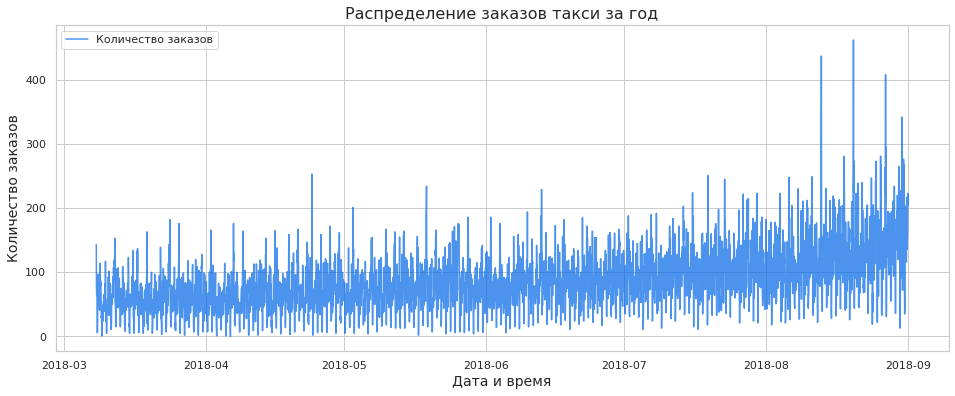

In [8]:
# Визуализация данных
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", palette="twilight_shifted_r")
plt.figure(figsize=(16, 6))
sns.lineplot(x=data_resampled.index, y=data_resampled['num_orders'], color=(0, 0.4, 0.9, 0.7), label='Количество заказов')
# Добавление заголовка и меток с переводом на русский
plt.title('Распределение заказов такси за год', fontsize=16)
plt.xlabel('Дата и время', fontsize=14)
plt.ylabel('Количество заказов', fontsize=14)
plt.grid(True)

# Отображение легенды
plt.legend()

# Показ графика
plt.show()

Видно, что количество заказов такси имеет значительные колебания в течение всего периода наблюдений, а также наблюдается явная тенденция к увеличению спроса ближе к концу периода. 

### Анализ суточных трендов

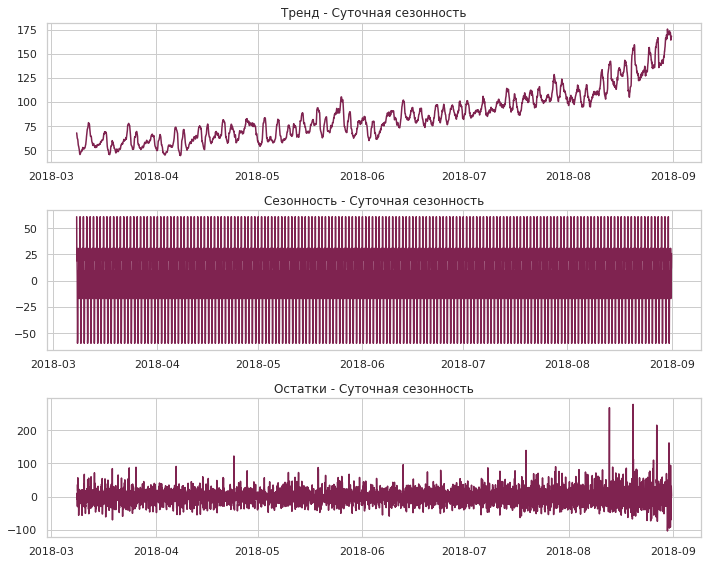

In [9]:
plot_seasonal_decompose(
    data_resampled['num_orders'], 
    period=24, 
    title='Суточная сезонность'
)

- **Тренд:** График тренда показывает постепенное увеличение количества заказов на такси на протяжении всего исследуемого периода. Видно, что тренд постепенно возрастает, с небольшими колебаниями, начиная с мая и достигая пиковых значений к концу августа. Этот рост может свидетельствовать о сезонном увеличении активности в летний период.

- **Сезонность:** График сезонности четко отображает суточные циклы спроса на такси. Каждое колебание на графике соответствует одному дню, где наиболее ярко выражены пики и спады в зависимости от времени суток. Сезонность показывает повторяющиеся ежедневные паттерны, такие как повышение спроса в утренние и вечерние часы и снижение активности в середине дня и ночью.

- **Остатки:** График остатков показывает вариативность, которая не объясняется трендом или суточной сезонностью. Остатки остаются относительно стабильными на протяжении всего периода, но ближе к концу августа наблюдаются более значительные отклонения, которые могут быть вызваны аномальными событиями или всплесками спроса.

### Анализ недельных трендов

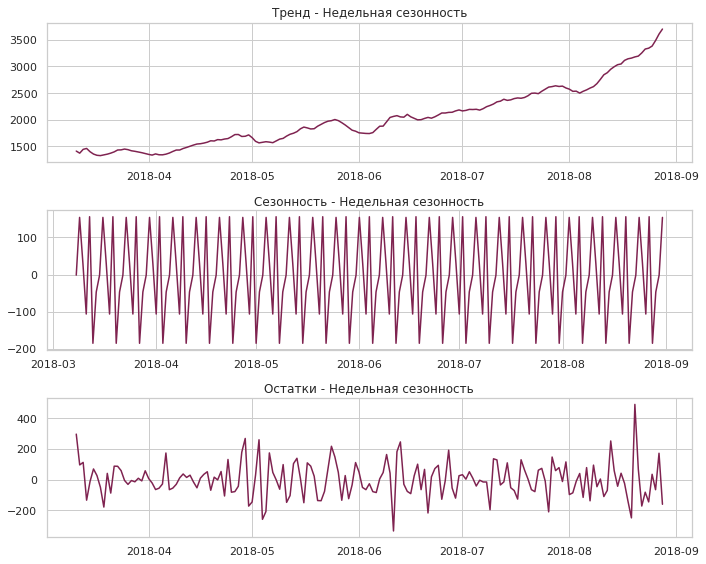

In [10]:
plot_seasonal_decompose(
    data_resampled['num_orders'].resample('D').sum(), 
    period=7, 
    title='Недельная сезонность'
)

- **Тренд:** На графике тренда виден общий тренд на рост.
- **Сезонность:** График сезонности показывает отчетливую недельную цикличность. Каждый пик на графике соответствует определенному дню недели, когда спрос на такси наиболее высок. Спады, как правило, соответствуют началу недели, когда активность снижается. 

###  Анализ месячных трендов

Посмотрим, как количество заказов меняется в течение месяца. Для этого построим график распределения заказов по дням месяца.

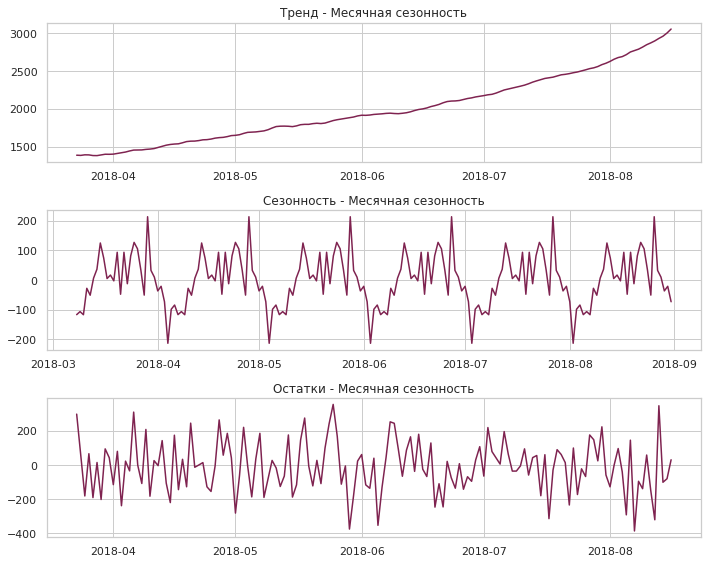

In [11]:
plot_seasonal_decompose(
    data_resampled['num_orders'].resample('D').sum(), 
    period=30, 
    title='Месячная сезонность'
)

- **Тренд:** График тренда демонстрирует общий тренд - уверенное и устойчивое увеличение количества заказов на такси на протяжении всего периода наблюдений.

- **Сезонность:** Колебания не столь регулярны, но можно заметить, что некоторые дни месяца имеют более высокий спрос на такси, чем другие. Это может быть связано с зарплатными периодами, выходными или другими регулярными событиями.


### Вывод

- Данные показывают четкую закономерность суточных и недельных колебаний спроса на такси. **Суточная сезонность** характеризуется повторяющимися пиками спроса ночью (00:00–02:00) и вечером (18:00–23:00), с минимальной активностью рано утром. **Недельная сезонность** проявляется в повышенной активности на такси в конце недели, особенно в пятницу и субботу, с минимальной активностью во вторник и воскресенье.

- В течение всего периода наблюдается устойчивый рост количества заказов на такси, что отражено на графиках тренда. Это увеличение может быть связано с сезонным ростом спроса, например, в летний период.

- **Месячная сезонность** показывает колебания, которые не столь регулярны, как суточные или недельные, однако в определенные дни месяца можно наблюдать повышенный спрос на такси, что может быть связано с такими событиями, как время получения зарплаты или другие циклические факторы.

- Пропуски в данных отсутствуют. Среднее количество заказов составляет около 84 заказов в час, с максимальным значением в 462 заказа.

- В целом, количество заказов на такси имеет значительные колебания, при этом наблюдается четкий тренд на увеличение количества заказов ближе к концу периода наблюдений, что может быть связано с увеличением спроса на такси в летние месяцы.


## Обучение

Наша цель — предсказать количество заказов на следующий час. Для этого обучим несколько моделей, подберем для них оптимальные гиперпараметры и сравним по метрике **RMSE**.

### Подготовка данных для обучения

Определим признаки и целевой столбец, разделим данные на обучающую и тестовую выборки.

In [12]:
# Определим признаки и целевой столбец
features = data_resampled.drop(columns=['num_orders'])
target = data_resampled['num_orders']

# Разделим данные на обучающую (90%) и тестовую (10%) выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=TEST_SIZE, shuffle=False)

# Выведем размеры обучающей и тестовой выборок
print(f"Размеры обучающей выборки: {X_train.shape}, тестовой выборки: {X_test.shape}")


Размеры обучающей выборки: (3807, 6), тестовой выборки: (441, 6)


### Настройка и обучение моделей

Cоздадим пайплайны для моделей **Линейной регресси**, **Случайного леса** и **CatBoost**. С помощью **RandomizedSearchCV** подберем гиперпараметры для каждой модели.

In [13]:
# Преобразование категориальных признаков с OHE
categorical_features = ['hour', 'dayofweek']
categorical_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'))
])

# Преобразование числовых признаков с масштабированием
# Обратите внимание, что мы используем актуальный набор признаков после добавления лагов
numeric_features = ['lag_1', 'lag_24', 'lag_168']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Создаем пайплайн для линейной регрессии с предобработкой данных
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Создаем пайплайн для случайного леса
pipeline_rf = Pipeline([
    ('model', RandomForestRegressor(random_state=RANDOM_STATE))
])

# Создаем пайплайн для CatBoost
pipeline_catboost = Pipeline([
    ('model', CatBoostRegressor(random_state=RANDOM_STATE, verbose=0))
])

# Обновляем пайплайны
pipelines = {
    'Линейная регрессия': pipeline_lr,
    'Случайный лес': pipeline_rf,
    'CatBoost': pipeline_catboost
}

# Настраиваем гиперпараметры для каждой модели
param_grid_lr = {'model__fit_intercept': [True, False]}
param_grid_rf = {'model__n_estimators': [10, 30, 50],
                 'model__max_depth': [2, 3, 5]}
param_grid_catboost = {'model__iterations': [100, 200, 300],
                       'model__learning_rate': [0.01, 0.1, 0.2],
                       'model__depth': [4, 6, 8]}


In [14]:
# Словарь для параметров сетки
param_grids = {
    'Линейная регрессия': param_grid_lr,
    'Случайный лес': param_grid_rf,
    'CatBoost': param_grid_catboost
}

# Используем TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Инициализация переменных для хранения лучших моделей и результатов
best_models = {}
best_rmse = float('inf')
best_model_name = None
best_model = None

for name, pipeline in pipelines.items():
    print(f"\nПодбор гиперпараметров для модели: {name}")
    
    # Применяем RandomizedSearchCV для подбора гиперпараметров
    random_search = RandomizedSearchCV(
        pipeline, param_grids[name], cv=tscv, 
        scoring='neg_root_mean_squared_error', n_iter=10, 
        n_jobs=-1, random_state=RANDOM_STATE
    )
    random_search.fit(X_train, y_train)
    
    # Лучшая модель
    best_model_temp = random_search.best_estimator_
    best_models[name] = best_model_temp
    
    # Оценка модели на кросс-валидации
    rmse_cv = -random_search.best_score_
    
    # Используем правильный атрибут best_params_
    print(f"Лучшие параметры для {name}: {random_search.best_params_}")
    print(f"RMSE на кросс-валидации: {rmse_cv}")
    
    # Сравниваем RMSE и находим лучшую модель
    if rmse_cv < best_rmse:
        best_rmse = rmse_cv
        best_model_name = name
        best_model = best_model_temp

# Вывод лучшей модели
print(f"\nЛучшая модель: {best_model_name} с RMSE на кросс-валидации: {best_rmse}")
print(f"Параметры лучшей модели: {best_model}")



Подбор гиперпараметров для модели: Линейная регрессия
Лучшие параметры для Линейная регрессия: {'model__fit_intercept': True}
RMSE на кросс-валидации: 23.192951146628474

Подбор гиперпараметров для модели: Случайный лес
Лучшие параметры для Случайный лес: {'model__n_estimators': 50, 'model__max_depth': 5}
RMSE на кросс-валидации: 23.875058499150704

Подбор гиперпараметров для модели: CatBoost
Лучшие параметры для CatBoost: {'model__learning_rate': 0.2, 'model__iterations': 100, 'model__depth': 6}
RMSE на кросс-валидации: 24.000356396125632

Лучшая модель: Линейная регрессия с RMSE на кросс-валидации: 23.192951146628474
Параметры лучшей модели: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lag_1', 'lag_24',
                      

### Выводы

- **Линейная регрессия**: Оптимальные настройки — включение свободного члена в уравнении. **RMSE** на кросс-валидации составил 23.19.
- **Случайный лес**: Оптимальные настройки — 50 деревьев в лесу и максимальная глубина деревьев — 5. **RMSE** на кросс-валидации составил 23.88.
- **CatBoost**: Оптимальные настройки — скорость обучения 0.2, 100 итераций и глубина деревьев 6. **RMSE** на кросс-валидации составил 24.

**Линейная регрессия** показала наилучший результат по метрике **RMSE** на кросс-валидации.


## Тестирование

Протестируем модели с лучшими гиперпараметрами на тестовой выборке.

In [15]:
# Предсказания на тестовых данных
y_pred = best_model.predict(X_test)

# Вычисление RMSE на тестовых данных
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE на тестовых данных для модели {best_model_name}: {rmse_test}")

RMSE на тестовых данных для модели Линейная регрессия: 37.33602051165473


### Вывод

**Линейная регрессия** справились с задачей, ошибки на тестовой выборке соответствуют требованиям проекта (**RMSE** ≤ 48). 

## Общий вывод

В рамках проекта стояла задача разработки модели для прогнозирования количества заказов такси на следующий час. Основной целью было снижение ошибки предсказания (**RMSE**) до значения не более 48. Было выполнено следующее:

**Подготовка**
- Данные о заказах были загружены и ресемплированы по одному часу.
- Были созданы дополнительные признаки — лагированные значения и скользящие средние за несколько предыдущих часов и неделю, что позволило модели учитывать временные зависимости.
- Данные были разделены на обучающую и тестовую выборки в пропорции 90:10.

**Анализ**
- Проведен анализ временных рядов, который выявил характерные пики спроса на такси ночью и вечером, а также увеличение активности в пятницу и субботу.
- Суточные и недельные тренды позволили лучше понять динамику спроса и сезонные колебания.

**Моделирование**
- Обучены три модели: **линейная регрессия**, **случайный лес** и **CatBoost**.
- Для каждой модели были подобраны оптимальные гиперпараметры с использованием **RandomizedSearchCV**.
- Модель **Линейная регрессия** показала наилучший результат на кросс-валидации с **RMSE** = **23.19**.

**Оценка на тестовой выборке**
- Модель **Линейная регрессия** продемонстрировала на тестовой выборке **RMSE** = **37.34**, что удовлетворяет требованиям задачи (**RMSE** ≤ **48**).

Модель **Линейной регрессии** успешно справилась с задачей, обеспечив требуемый уровень точности предсказаний на тестовой выборке.
